## `Time series Forecasting Of Nigeria Food Prices`

In [34]:
# 1. Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates

In [ ]:
# 2. Load and prepare the data
dg = pd.read_excel('food prices.xlsx')
# convert date to datetime
dg['Date'] = pd.to_datetime(dg['Date'], format='%Y')
# set date as index
dg.set_index('Date', inplace=True)

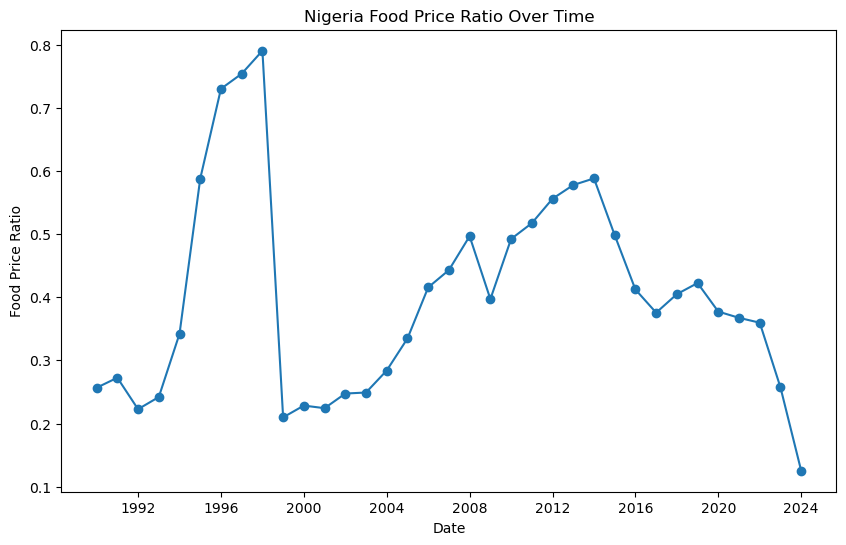

In [36]:
# 3. Plot the original time series
plt.figure(figsize=(10,6))
plt.plot(dg.index, dg['Food Price Ratio'], marker='o')
plt.title('Nigeria Food Price Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Food Price Ratio')
plt.show()

This chart displays the actual food price ratio for Nigeria over the years;

- **X-axis (Date):** Shows the years from your data, taken directly from the 'Date' column.
- **Y-axis (Food Price Ratio):** Plots the real food price ratio values for each year.
- **Data Points:** Each dot represents the food price ratio for a specific year in Nigeria.
- **Line:** Connects the dots to show how the food price ratio has changed over time.
- **Title and Labels:** The chart is titled "Nigeria Food Price Ratio Over Time" with clear axis labels.

**What you learn:**  
This visualization lets you see the actual trend and fluctuations in Nigeria’s food price ratio before any forecasting is applied. It provides a baseline for understanding how food prices have behaved historically in your dataset.

In [37]:
# 4. Fit ARIMA model (order can be tuned)
model = ARIMA(dg['Food Price Ratio'], order=(1,1,1))
model_fit = model.fit()

c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [39]:
# 5. Forecast next 15 years
forecast = model_fit.get_forecast(steps=15)
pred = forecast.predicted_mean
conf_int = forecast.conf_int()

C:\Users\user\AppData\Local\Temp\ipykernel_9716\3568630169.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(dg.index[-1], periods=16, freq='Y')[1:]


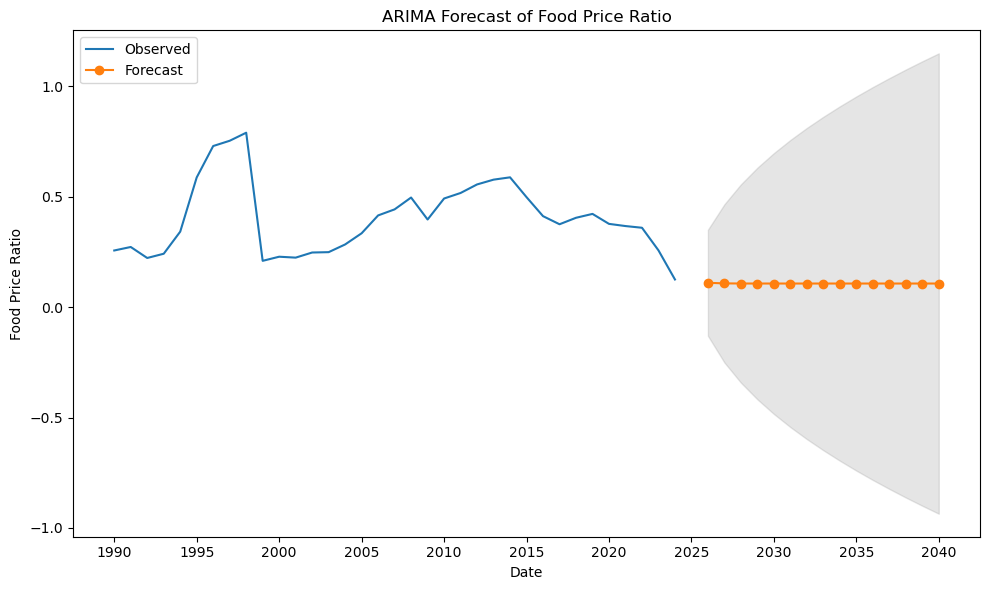

In [40]:
# 6. Plot forecast with 5-year intervals
future_years = pd.date_range(dg.index[-1], periods=16, freq='Y')[1:]
plt.figure(figsize=(10,6))
plt.plot(dg.index, dg['Food Price Ratio'], label='Observed')
plt.plot(future_years, pred, label='Forecast', marker='o')
plt.fill_between(future_years, conf_int.iloc[:,0], conf_int.iloc[:,1], color='gray', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Food Price Ratio')
plt.title('ARIMA Forecast of Food Price Ratio')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

This chart displays the ARIMA-based forecast of Nigeria's food price ratio for the next 15 years;

- **X-axis (Date):** Shows the years, with ticks every 5 years for clarity.
- **Y-axis (Food Price Ratio):** Plots both the historical and forecasted food price ratio values.
- **Observed Data:** The solid line represents the actual food price ratio from your dataset.
- **Forecast Data:** The dotted line with markers shows the predicted food price ratio for future years.
- **Confidence Interval:** The shaded region around the forecast line indicates the uncertainty range (upper and lower bounds).
- **Title and Labels:** The chart is titled "ARIMA Forecast of Food Price Ratio" with clear axis labels.

**What you learn:**  
This visualization lets you see both the historical trend and the projected changes in Nigeria’s food price ratio, including the uncertainty in the forecast. It helps you understand possible future scenarios based on past data.